## Cricket World Cup Matches 1975 to 2019 - Exploratory Data Analysis

In [1]:
#importing all the nesscessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
# loading the dataset of cricket-world-cup from 1975 to 2019
cwc = pd.read_csv('CWC-1975-2019.csv', encoding = 'unicode_escape')

In [3]:
#size of the dataframe
cwc.shape

(454, 12)

In [4]:
cwc.head()

,Index,venue,team1,score1,team2,score2,result,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1,"1st Match, Lord's, June 07, 1975, Prudential W...",England,334/4,India,132/3,England won by 202 runs,NaN,NaN,NaN,NaN,NaN
1,2,"2nd Match, Birmingham, June 07, 1975, Prudenti...",New Zealand,309/5,East Africa,128/8,New Zealand won by 181 runs,NaN,NaN,NaN,NaN,NaN
2,3,"3rd Match, Leeds, June 07, 1975, Prudential Wo...",Australia,278/7,Pakistan,205,Australia won by 73 runs,NaN,NaN,NaN,NaN,NaN
3,4,"4th Match, Manchester, June 07, 1975, Prudenti...",Sri Lanka,86,West Indies,87/1,West Indies won by 9 wickets (with 236 balls r...,NaN,NaN,NaN,NaN,NaN
4,5,"5th Match, Nottingham, June 11, 1975, Prudenti...",England,266/6,New Zealand,186,England won by 80 runs,NaN,NaN,NaN,NaN,NaN


In [5]:
cwc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        454 non-null    int64  
 1   venue        454 non-null    object 
 2   team1        454 non-null    object 
 3   score1       445 non-null    object 
 4   team2        454 non-null    object 
 5   score2       440 non-null    object 
 6   result       454 non-null    object 
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
dtypes: float64(5), int64(1), object(6)
memory usage: 42.7+ KB


In [6]:
# Removming the unnesscary columns
columns_to_delete = ['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11']

cwc = cwc.drop(columns=columns_to_delete)

cwc.head(2)

,Index,venue,team1,score1,team2,score2,result
0,1,"1st Match, Lord's, June 07, 1975, Prudential W...",England,334/4,India,132/3,England won by 202 runs
1,2,"2nd Match, Birmingham, June 07, 1975, Prudenti...",New Zealand,309/5,East Africa,128/8,New Zealand won by 181 runs


In [7]:
#Renaming the columns for better understanding
cwc = cwc.rename(columns = {'venue':'year', 'team1':'team_bat_first', 'score1':'score_first', 
                            'team2':'team_bat_second', 'score2':'score_second'})
cwc.head(1)

,Index,year,team_bat_first,score_first,team_bat_second,score_second,result
0,1,"1st Match, Lord's, June 07, 1975, Prudential W...",England,334/4,India,132/3,England won by 202 runs


In [8]:
# checking the null values 
cwc.isnull().sum()

Index               0
year                0
team_bat_first      0
score_first         9
team_bat_second     0
score_second       14
result              0
dtype: int64

In [9]:
# getting the names of those columns which contains null values
[features for features in cwc.columns if cwc[features].isnull().sum() > 0]

['score_first', 'score_second']

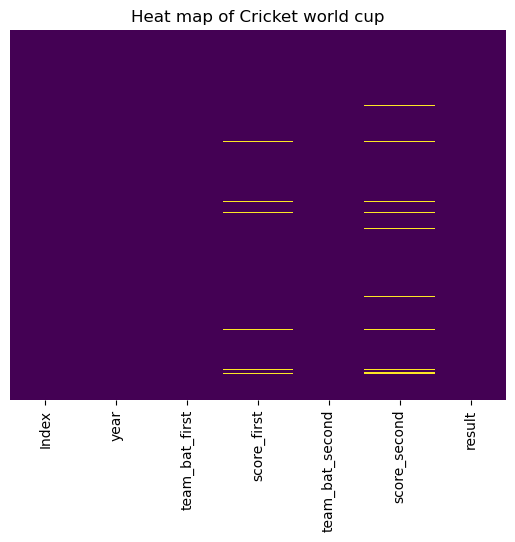

In [10]:
# heatmap for null values
sns.heatmap(cwc.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Heat map of Cricket world cup')
plt.show()

In [11]:
# spliting the runs scored from wicket out of both the teams
cwc['score_first'] = cwc['score_first'].str.split('/').str[0]
cwc['score_second'] = cwc['score_second'].str.split('/').str[0]

In [12]:
cwc.head(2)

,Index,year,team_bat_first,score_first,team_bat_second,score_second,result
0,1,"1st Match, Lord's, June 07, 1975, Prudential W...",England,334,India,132,England won by 202 runs
1,2,"2nd Match, Birmingham, June 07, 1975, Prudenti...",New Zealand,309,East Africa,128,New Zealand won by 181 runs


In [13]:
# changing data type of score_first  
cwc['score_first'] = pd.to_numeric(cwc['score_first'])

In [14]:
# checking what's the error at 96th row to rectify it
cwc.iloc[96,:]

Index                                                             97
year               13th Match, Adelaide, March 01, 1992, Benson &...
team_bat_first                                              Pakistan
score_first                                                     74.0
team_bat_second                                              England
score_second                                                  24-Jan
result                                                     No result
Name: 96, dtype: object

In [15]:
# replacing inappropriate value with 0
cwc.replace('24-Jan', 0, inplace= True)

In [16]:
# changing data type of score_second 
cwc['score_second'] = pd.to_numeric(cwc['score_second'])

In [17]:
cwc.dtypes

Index                int64
year                object
team_bat_first      object
score_first        float64
team_bat_second     object
score_second       float64
result              object
dtype: object

In [18]:
# Calculating the mean of run scored by first team bated
mean_value1 = cwc['score_first'][cwc['score_first'] != ''].mean()

print(round(mean_value1))
##
# Calculating the mean of run scored by second team bated
mean_value2 = cwc['score_second'][cwc['score_second'] != ''].mean()

print(round(mean_value2))

238
196


In [19]:
# replacing the empty value in score first with mean value
cwc['score_first'].replace(0 , mean_value1 ,inplace = True)

# replacing the empty value in score second with mean value
cwc['score_second'].replace(0, mean_value2 ,inplace = True)

In [20]:
# extracting which team won the match
def extract_team_won(row):
    score_first = row['score_first']
    score_second = row['score_second']
    
    if score_first > score_second:
        return row['team_bat_first']
    elif score_first < score_second:
        return row['team_bat_second']
    else:
        return 'Draw'

            
cwc['team_won'] = cwc.apply(extract_team_won, axis=1)


In [21]:
cwc

,Index,year,team_bat_first,score_first,team_bat_second,score_second,result,team_won
0,1,"1st Match, Lord's, June 07, 1975, Prudential W...",England,334.0,India,132.0,England won by 202 runs,England
1,2,"2nd Match, Birmingham, June 07, 1975, Prudenti...",New Zealand,309.0,East Africa,128.0,New Zealand won by 181 runs,New Zealand
2,3,"3rd Match, Leeds, June 07, 1975, Prudential Wo...",Australia,278.0,Pakistan,205.0,Australia won by 73 runs,Australia
3,4,"4th Match, Manchester, June 07, 1975, Prudenti...",Sri Lanka,86.0,West Indies,87.0,West Indies won by 9 wickets (with 236 balls r...,West Indies
4,5,"5th Match, Nottingham, June 11, 1975, Prudenti...",England,266.0,New Zealand,186.0,England won by 80 runs,England
...,...,...,...,...,...,...,...,...
449,450,"44th match, Leeds, July 06, 2019, ICC Cricket ...",Sri Lanka,264.0,India,265.0,India won by 7 wickets (with 39 balls remaining),India
450,451,"45th match (D/N), Manchester, July 06, 2019, I...",South Africa,325.0,Australia,315.0,South Africa won by 10 runs,South Africa
451,452,"1st Semi-final, Manchester, July 09 - 10, 2019...",New Zealand,239.0,India,221.0,New Zealand won by 18 runs,New Zealand
452,453,"2nd Semi-final, Birmingham, July 11, 2019, ICC...",Australia,223.0,England,226.0,England won by 8 wickets (with 107 balls remai...,England


In [22]:
country_names=cwc.team_won.value_counts().index
country_names

Index(['Australia', 'India', 'New Zealand', 'England', 'Pakistan',
       'West Indies', 'South Africa', 'Sri Lanka', 'Draw', 'Bangladesh',
       'Zimbabwe', 'Ireland', 'Kenya', 'Canada', 'Netherlands', 'Afghanistan',
       'United Arab Emirates'],
      dtype='object')

In [23]:
cwc.isnull().sum()

Index               0
year                0
team_bat_first      0
score_first         9
team_bat_second     0
score_second       14
result              0
team_won            0
dtype: int64

In [24]:
cwc1 = cwc[cwc.isna().any(axis=1)]
print (cwc1)

     Index                                               year team_bat_first  \
19      20  5th Match, The Oval, June 13 - 15, 1979, Prude...      Sri Lanka   
92      93  9th Match, Mackay, February 28, 1992, Benson &...          India   
127    128  5th Match, Colombo (RPS), February 17, 1996, W...      Sri Lanka   
136    137  15th Match, Colombo (RPS), February 25, 1996, ...      Sri Lanka   
138    139  16th Match, Patna, February 26, 1996, Wills Wo...       Zimbabwe   
210    211  8th Match, Harare, February 13, 2003, ICC Worl...       Zimbabwe   
223    224  21st Match, Nairobi (Gym), February 21, 2003, ...          Kenya   
243    244  41st Match, Bulawayo, March 04, 2003, ICC Worl...       Pakistan   
327    328  20th Match, Group A (D/N), Colombo (RPS), Marc...      Sri Lanka   
367    368  11th Match, Pool A (D/N), Brisbane, February 2...      Australia   
416    417  11th match, Bristol, June 07, 2019, ICC Cricke...       Pakistan   
420    421  15th match, Southampton, Jun

In [25]:
# droping the null value 
cwc.dropna(inplace = True)

In [26]:
cwc.isnull().sum()

Index              0
year               0
team_bat_first     0
score_first        0
team_bat_second    0
score_second       0
result             0
team_won           0
dtype: int64

In [27]:
# droping the result column
cwc = cwc.drop(columns = 'result')

In [28]:
cwc.head(1)

,Index,year,team_bat_first,score_first,team_bat_second,score_second,team_won
0,1,"1st Match, Lord's, June 07, 1975, Prudential W...",England,334.0,India,132.0,England


In [29]:
# extracting the years from the venue column
cwc['Years'] = cwc['year'].str.extract(r'(\b\d{4}\b)')
cwc['Years']

0      1975
1      1975
2      1975
3      1975
4      1975
       ... 
449    2019
450    2019
451    2019
452    2019
453    2019
Name: Years, Length: 440, dtype: object

In [30]:
# Year and Years columns are same
cwc['year']=cwc['Years']

cwc.head(2)

,Index,year,team_bat_first,score_first,team_bat_second,score_second,team_won,Years
0,1,1975,England,334.0,India,132.0,England,1975
1,2,1975,New Zealand,309.0,East Africa,128.0,New Zealand,1975


In [31]:
# Deleting the 'Years' column from the dataset
columns_to_delete2 = ['Years']
cwc = cwc.drop(columns = columns_to_delete2)
cwc.head(2)

,Index,year,team_bat_first,score_first,team_bat_second,score_second,team_won
0,1,1975,England,334.0,India,132.0,England
1,2,1975,New Zealand,309.0,East Africa,128.0,New Zealand


In [32]:
cwc.dtypes

Index                int64
year                object
team_bat_first      object
score_first        float64
team_bat_second     object
score_second       float64
team_won            object
dtype: object

In [33]:
#Descriptive statistics
cwc.describe()

,Index,score_first,score_second
count,440.000000,440.000000,440.000000
mean,226.611364,240.261364,196.377118
std,130.971563,70.903299,57.867719
min,1.000000,36.000000,32.000000
25%,112.750000,195.750000,156.750000
50%,227.500000,241.000000,199.500000
75%,339.250000,288.000000,233.000000
max,454.000000,417.000000,338.000000


## Exploring the data about categorical Variables

In [34]:
# frequency table for team won
frequency_table = cwc['team_won'].value_counts()
print(f'Frequency Table for team won :\n{frequency_table}\n')

Frequency Table for team won :
Australia               69
India                   54
New Zealand             53
England                 47
Pakistan                45
West Indies             43
South Africa            40
Sri Lanka               39
Bangladesh              14
Zimbabwe                12
Ireland                  7
Kenya                    6
Draw                     4
Canada                   2
Netherlands              2
Afghanistan              2
United Arab Emirates     1
Name: team_won, dtype: int64



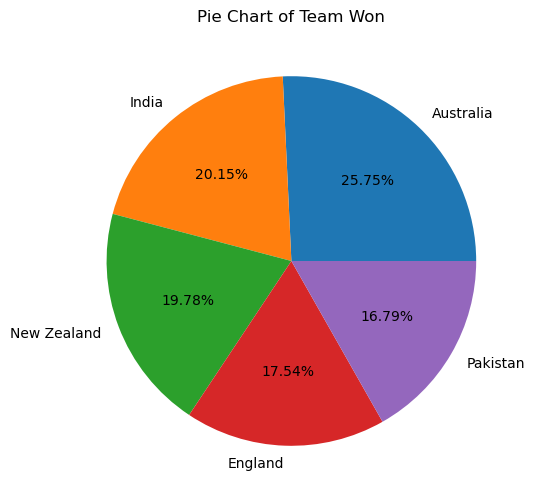

In [35]:
# pie chart showing Top five countries who had win the matches
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt.pie(frequency_table[:5],labels=frequency_table.index[:5],autopct='%1.2f%%')
plt.title('Pie Chart of Team Won')
plt.show()

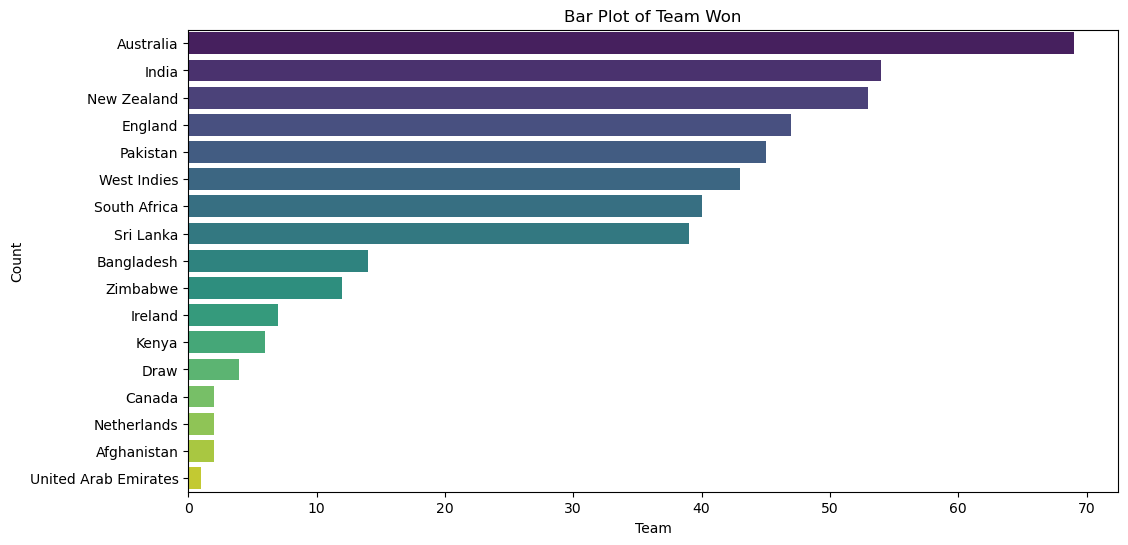

In [36]:
# bar plot for how many matches won by teams in cricket world cup.
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x=frequency_table , y=frequency_table.index ,data=cwc,orient='horizontal' ,palette='viridis')
plt.title('Bar Plot of Team Won')
plt.xlabel('Team')
plt.ylabel('Count')
plt.show()

## Exploring the data about Numerical Variables

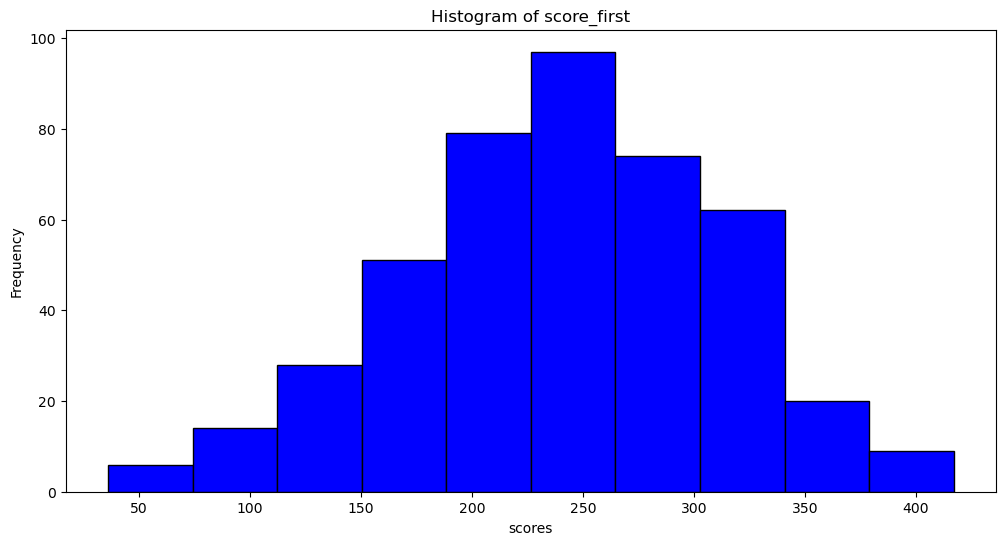

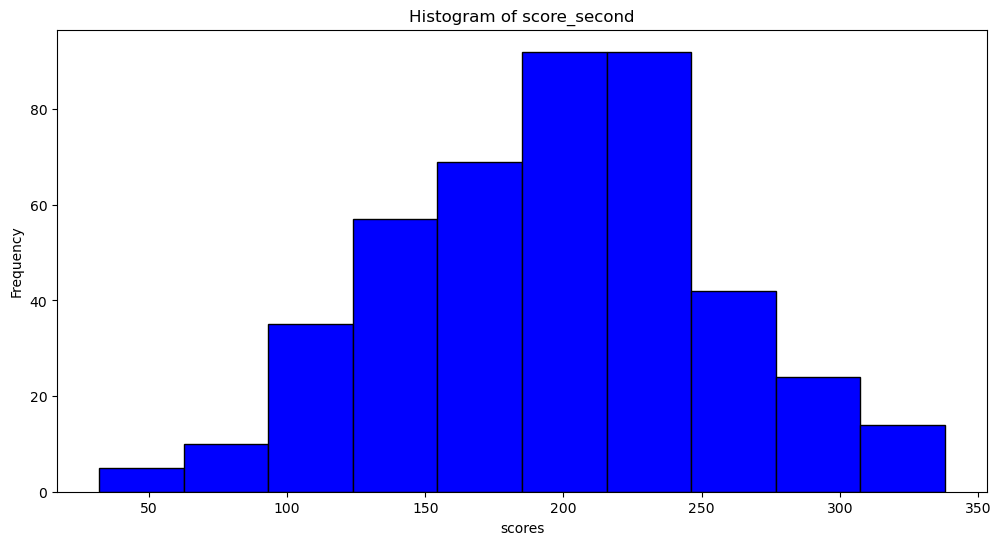

In [37]:
# making a list of score_first and score_second 
teams_scores = ['score_first', 'score_second']

# histogram to visualize the distribution of teams_scores
teams_scores = cwc.select_dtypes(include=['float', 'float']).columns
for column in teams_scores:
    plt.hist(cwc[column], bins=10, color='blue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel('scores')
    plt.ylabel('Frequency')
    plt.show()

In [38]:
info1 = cwc['score_first'].describe()
print(info1)
info2 = cwc['score_second'].describe()
print(info2)

count    440.000000
mean     240.261364
std       70.903299
min       36.000000
25%      195.750000
50%      241.000000
75%      288.000000
max      417.000000
Name: score_first, dtype: float64
count    440.000000
mean     196.377118
std       57.867719
min       32.000000
25%      156.750000
50%      199.500000
75%      233.000000
max      338.000000
Name: score_second, dtype: float64


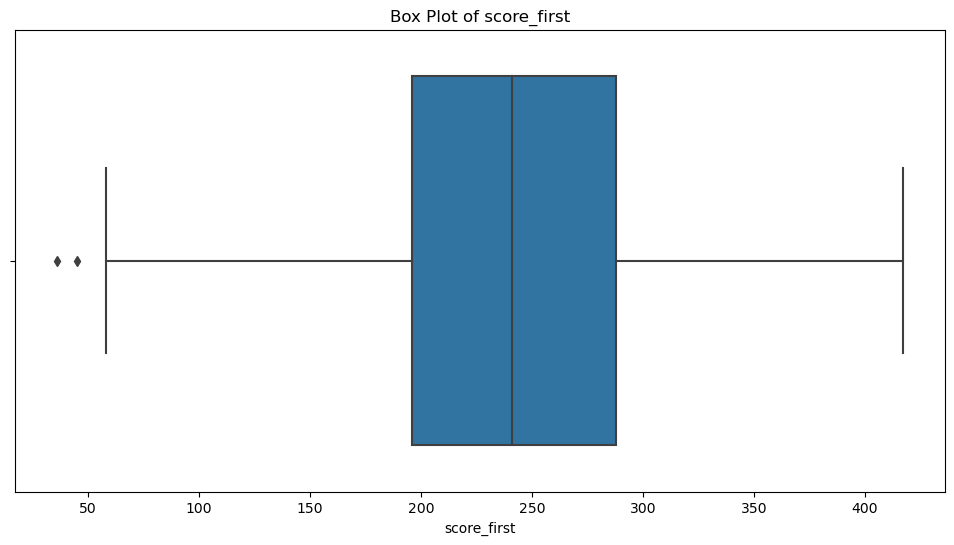

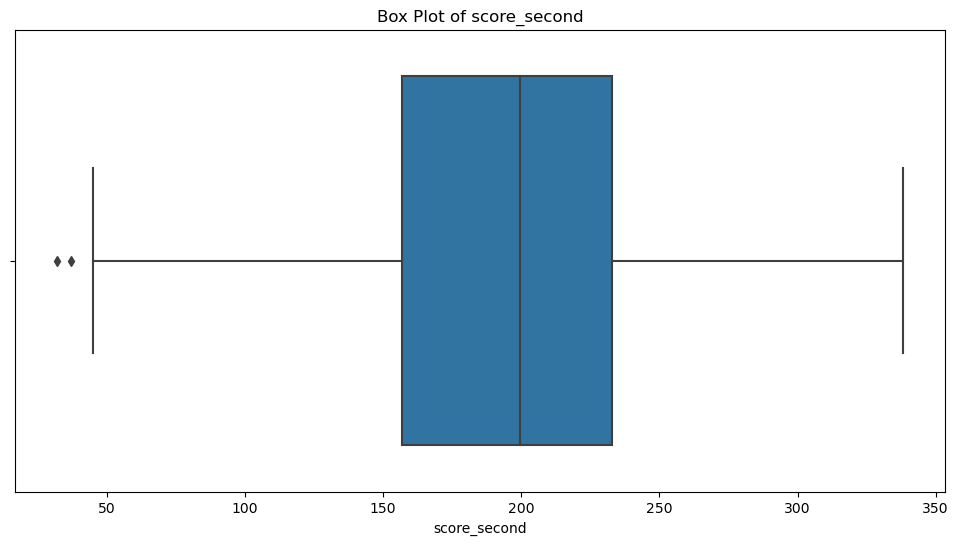

In [39]:
# box plot for identify central tendencyand spread of teams_scores
for column in teams_scores:
    sns.boxplot(x=cwc[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

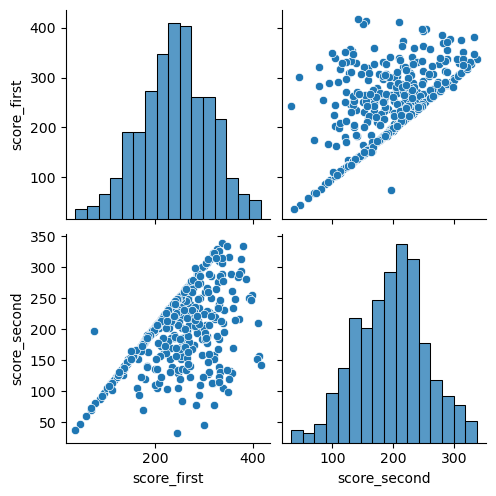

In [42]:
# pair plot for relationship between teams_scores
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.pairplot(cwc[teams_scores])
plt.show()

C:\Users\mansh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


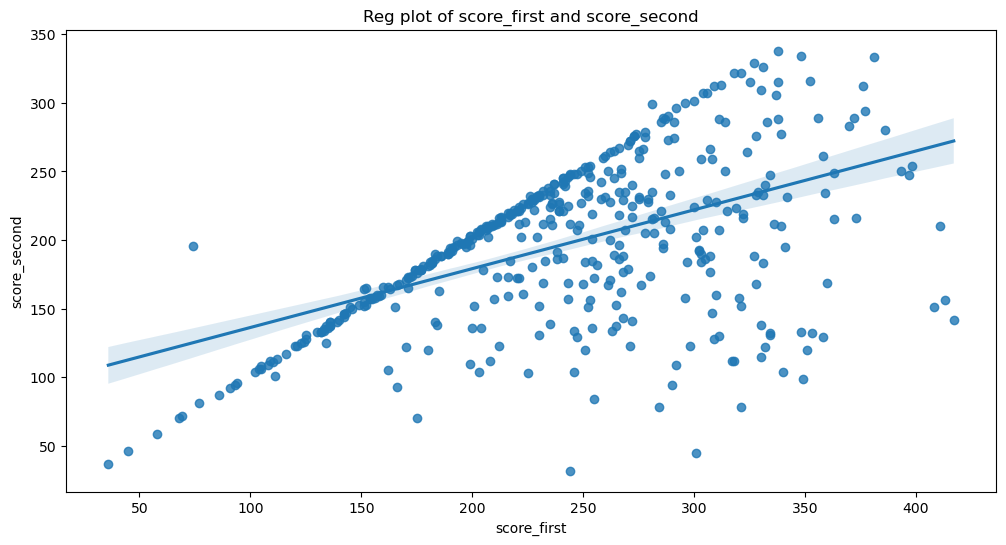

In [43]:
# regplot of score_first and score_second
sns.regplot(cwc['score_first'],cwc['score_second'])
plt.title('Reg plot of score_first and score_second')
plt.show()

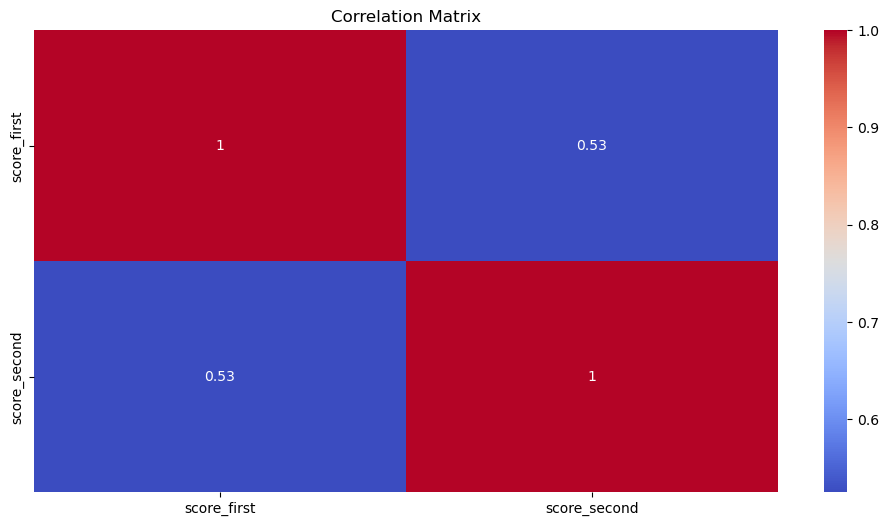

In [44]:
#correlation matrix to show correlation between score_first and score_second
correlation_matrix = cwc[teams_scores].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [45]:
cwc.corr()

,Index,score_first,score_second
Index,1.000000,0.205981,0.161226
score_first,0.205981,1.000000,0.525284
score_second,0.161226,0.525284,1.000000


# Conclusion
1. Score_first histogram is symmetric, this means the mean and median are close together.
   Score_second histogram is right skewed, so the mean is larger than the median.
2. Minimum run scored by a team who batted first is 36 and the team who batted second scored 32.
   Maximum run scored by a team who batted first is 417 and the team who batted second scored 338.
3. Box plot represents all the central tendency values of the team who batted first and second.
4. The positive slope of rep plot represents that there is the positive linear relation between score_first and score_second.
   As the value of independent variable, i.e. score_first increase, the values of dependent variables, i.e. score_second
   also increases.
5. There a is +ve correlation between score_first and score_second.